### 와인 품질 EDA

- https://github.com/cbrownley/foundations-for-analytics-with-python


- 와인의 품질에는 어떤 요소가 영향을 많이 줄지, 그 영향이 통계적으로 유의한지 알아보자


In [108]:
#라이브러리 정의

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
#데이터 읽어오기, 테이블 살짝 조정해주기

wine = pd.read_csv('./winequality-both.csv', sep=',', header=0)
wine.columns = wine.columns.str.replace(' ', '_')
wine

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [98]:
#결측치 확인하기

wine.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- 결측치 없음

In [99]:
#요약 정보 확인하기

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
#요약 통계 확인하기

wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
#레드 와인, 화이트 와인의 개수와 품질 고유값 찾아내기

print(wine.quality.value_counts())
print(wine.type.value_counts())

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
white    4898
red      1599
Name: type, dtype: int64


AxesSubplot(0.125,0.11;0.775x0.77)
AxesSubplot(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Counts of Wine by Quality')

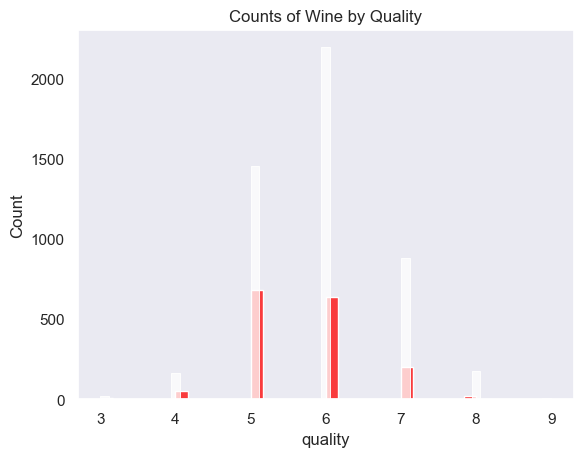

In [90]:
#시각화하면서 탐색하기

sns.set_theme(style='dark')

red_wine = wine.loc[wine['type'] == 'red', 'quality']
white_wine = wine.loc[wine['type'] == 'white', 'quality']

print(sns.histplot(data=red_wine, color='Red', label='Red Wine'))
print(sns.histplot(data=white_wine, color='white', label='White Wine'))
plt.title('Counts of Wine by Quality')

In [26]:
#상관관계 분석하기

wine.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32632\3997320868.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wine.corr()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


C:\Users\Administrator\AppData\Local\Temp\ipykernel_32632\2611584541.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=wine.corr(), cmap='Blues')


<AxesSubplot: >

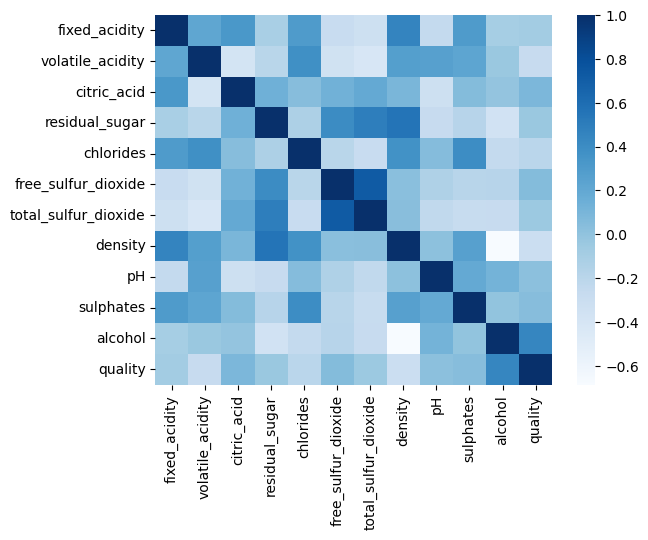

In [36]:
#상관관계 시각화

sns.heatmap(data=wine.corr(), cmap='Blues')

- 1. quality와 alcohol이 유의미한 상관관계를 가진다.


- 2. residual_sugar와 density가 유의미한 상관관계를 가진다.


- 3. density와 alcohol이 유의미한 상관관계를 가진다.

Text(0.5, 1.0, '1. Quality by Alcohol')

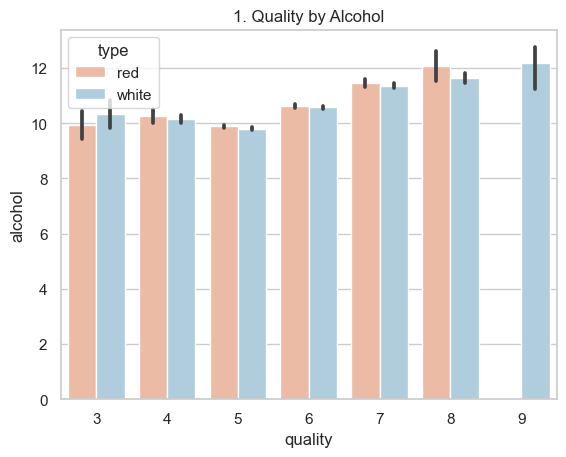

In [93]:
#분석한 상관관계에 따라 두 개 이상의 변수 탐색하기

sns.set_style('whitegrid')
sns.barplot(wine, x='quality', y='alcohol', hue='type', palette='RdBu')
plt.title('1. Quality by Alcohol')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32632\2890491864.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(wine, x='quality', y='alcohol', hue='type', ci=None, palette='RdBu')


Text(0.5, 1.0, 'Alcohol changes by quality')

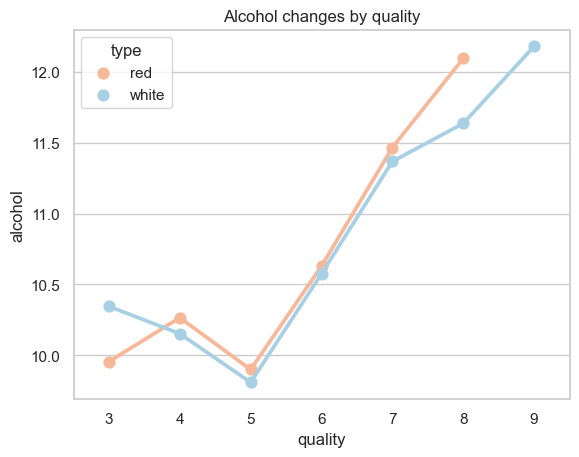

In [96]:
sns.pointplot(wine, x='quality', y='alcohol', hue='type', ci=None, palette='RdBu')
plt.title('Alcohol changes by quality')

Text(0.5, 1.0, '2. Residual Sugar by Density')

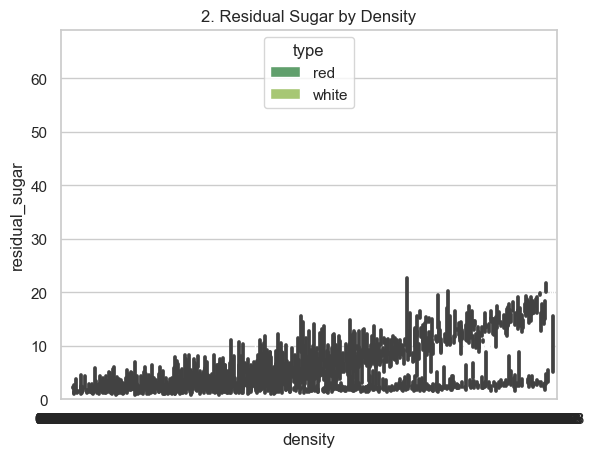

In [74]:
sns.barplot(wine, x='density', y='residual_sugar', hue='type', palette='summer')
plt.title('2. Residual Sugar by Density')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_32632\1594631851.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=wine, x='density', y='alcohol', hue='type', ci=None, palette='RdBu')


Text(0.5, 1.0, '3. Alcohol by Density')

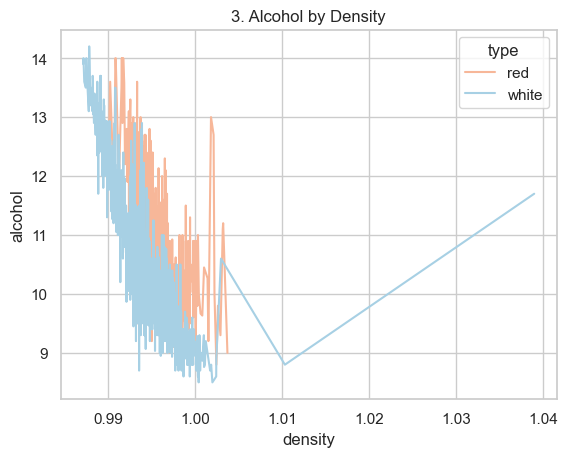

In [95]:
sns.lineplot(data=wine, x='density', y='alcohol', hue='type', ci=None, palette='RdBu')
plt.title('3. Alcohol by Density')

In [106]:
#와인 종류에 따라 품질의 차이가 통계적으로 유의미한지 알아보기 위해 그룹화, t검정 실시

print(wine.groupby(['type'])[['quality']].agg(['std', 'mean']))
tstat, pvalue, df = sm.stats.ttest_ind(red_wine, white_wine)
print('tstat: %.3f pvalue: %.4f' % (tstat, pvalue))

        quality          
            std      mean
type                     
red    0.807569  5.636023
white  0.885639  5.877909
tstat: -9.686 pvalue: 0.0000


- 유의확률 pvalue값이 유의수준(0.05)보다 작으므로 종류에 따른 품질의 차이가 통계적으로 유의미하다.

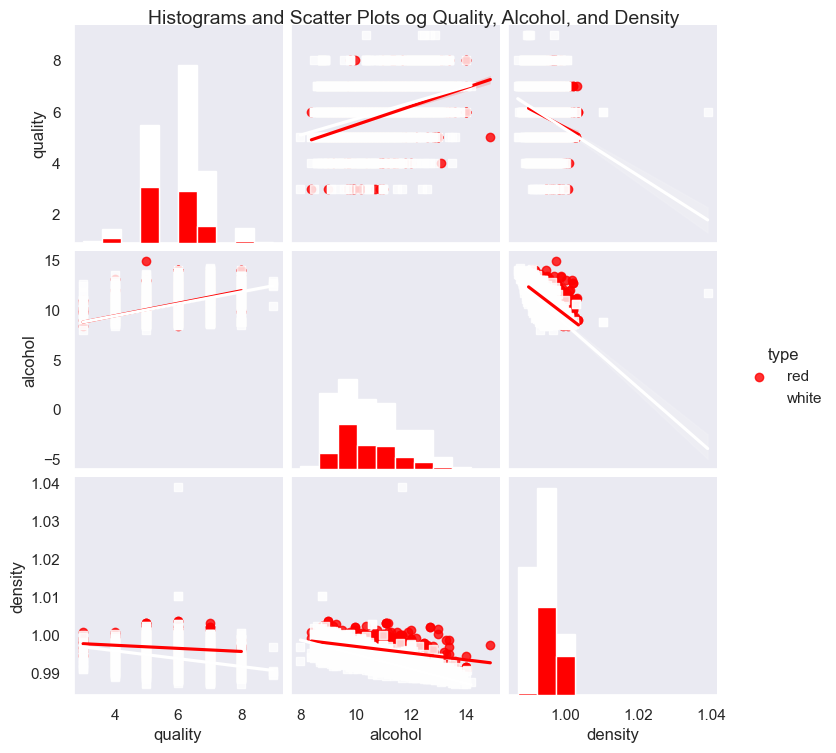

In [114]:
sns.set_style('dark')

sns.pairplot(data=wine, kind='reg', diag_kind='hist', diag_kws={'bins': 10, 'alpha': 1.0}, palette=dict(red='red', white='white'), vars=['quality', 'alcohol', 'density'], markers=['o', 's'], hue='type')
plt.suptitle('Histograms and Scatter Plots og Quality, Alcohol, and Density', fontsize=14, horizontalalignment='center', verticalalignment='top', x=0.5, y=0.999)
plt.show()